# Chapter 7 - Multivariate Time Series Analysis

In [2]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import statsmodels.api as sm
from PythonTsa.plot_multi_ACF import multi_ACFfig
from PythonTsa.MultiCorrPvalue import MultiTrCorrPvalue
from PythonTsa.plot_multi_Q_pvalue import MultiQpvalue_plot
from statsmodels.tsa.vector_ar.var_model import VARProcess
from statsmodels.tsa.api import VAR
from statsmodels.tsa.api import VARMAX

In [4]:
import warnings
warnings.filterwarnings("ignore")
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)
from statsmodels.tools.sm_exceptions import ValueWarning
warnings.simplefilter('ignore', ValueWarning)

## Four-Dimensional Gauss White Noise

If a white noise $ \varepsilon_t \sim N(0, \Sigma) $, then it is a **Gauss (normal) white noise**. Now suppose that the **four-dimensional white noise** follows:

$$
\varepsilon_t \sim N(0, \Sigma)
$$

where:

$$
\Sigma =
\begin{bmatrix}
1.0 & 0.6 & 0.2 & 0.1 \\
0.6 & 1.0 & 0.1 & 0.4 \\
0.2 & 0.1 & 1.0 & 0.5 \\
0.1 & 0.4 & 0.5 & 1.0
\end{bmatrix}
$$

is a **symmetric positive definite matrix**. Thus, we have:

$$
\rho(0) = \Sigma
$$

and for any integer \( h > 0 \):

$$
\Gamma(h) = \rho(h) = 0.
$$


In [6]:
mean = [0, 0, 0, 0]

cov = [[1.0, 0.6, 0.2, 0.1], 
        [0.6, 1.0, 0.1, 0.4], 
        [0.2, 0.1, 1.0, 0.5], 
        [0.1, 0.4, 0.5, 1.0]]

np.random.seed(1517)
x = np.random.multivariate_normal(mean, cov, size = 10000)

x

array([[ 0.63509151, -0.0045467 , -0.275352  , -0.8397913 ],
       [ 0.11950401, -0.39322279,  0.50341647,  0.00272577],
       [ 0.99462704,  0.12652556, -0.56322478,  0.24802391],
       ...,
       [-1.63675566, -0.99449025,  1.68779309,  0.47344637],
       [ 0.21008242, -1.38855695,  0.48510882,  0.61846816],
       [ 0.82956826,  0.65933497,  2.03126515, -0.35464362]])

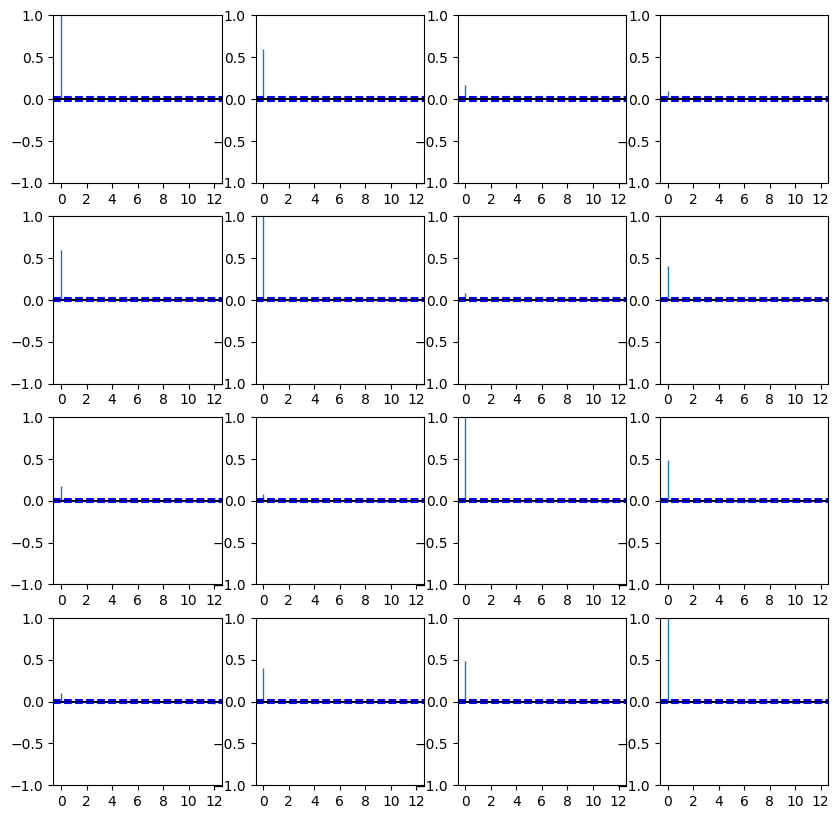

In [7]:
# Plot the Auto-Correlation Function (ACF) for multiple time series
multi_ACFfig(x,          # Input data
             nlags=12);  # Number of lags to compute the autocorrelation

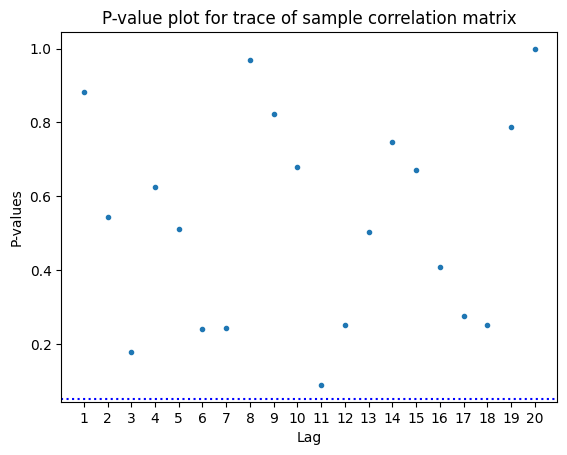

In [8]:
# Compute the test statistic and p-value for multivariate time series autocorrelation
tr_st, pv = MultiTrCorrPvalue(x,        # Input data
                              lags=20)  # Number of lags to test for autocorrelation

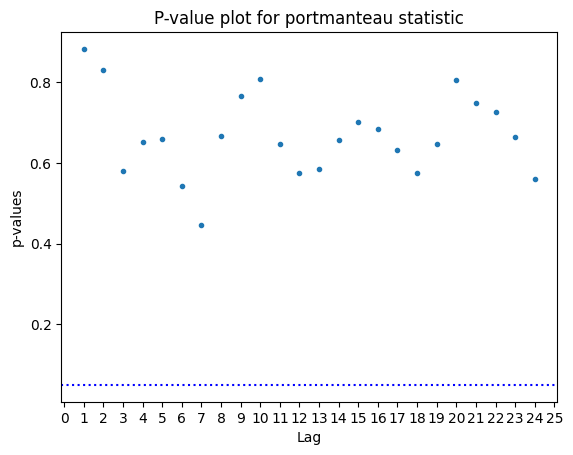

In [9]:
# Compute the Q-statistic and p-value for testing autocorrelation in a multivariate time series
qs, pv = MultiQpvalue_plot(x,          # Input data
                           nolags=24)  # Number of lags to test for autocorrelation

## USA GDP and Unemployment Rate Vector Time Series

In [11]:
url2 = ('https://raw.githubusercontent.com/QuantLet/pyTSA/refs/heads/main/pyTSA_USUnempGDP/USQgdpunemp.csv')

mda = pd.read_csv(url2, header = 0)

mda

,year,mon,gdp,rate
0,1948,1,1821.809,3.733333
1,1948,4,1855.345,3.666667
2,1948,7,1865.320,3.766667
3,1948,10,1868.184,3.833333
4,1949,1,1842.240,4.666667
...,...,...,...,...
251,2010,10,13216.110,9.566667
252,2011,1,13227.870,9.000000
253,2011,4,13271.830,9.033333
254,2011,7,13331.560,9.066667


In [12]:
mda = mda[['gdp', 'rate']]

dates = pd.date_range('1948-01', periods = len(mda), freq = 'QE')

mda.index = dates

mda

,gdp,rate
1948-03-31,1821.809,3.733333
1948-06-30,1855.345,3.666667
1948-09-30,1865.320,3.766667
1948-12-31,1868.184,3.833333
1949-03-31,1842.240,4.666667
...,...,...
2010-12-31,13216.110,9.566667
2011-03-31,13227.870,9.000000
2011-06-30,13271.830,9.033333
2011-09-30,13331.560,9.066667


In [13]:
mda['gdp'] = np.log(mda['gdp'])

mda.columns = ['lgdp', 'rate']

mda

,lgdp,rate
1948-03-31,7.507585,3.733333
1948-06-30,7.525826,3.666667
1948-09-30,7.531188,3.766667
1948-12-31,7.532722,3.833333
1949-03-31,7.518738,4.666667
...,...,...
2010-12-31,9.489192,9.566667
2011-03-31,9.490081,9.000000
2011-06-30,9.493399,9.033333
2011-09-30,9.497889,9.066667


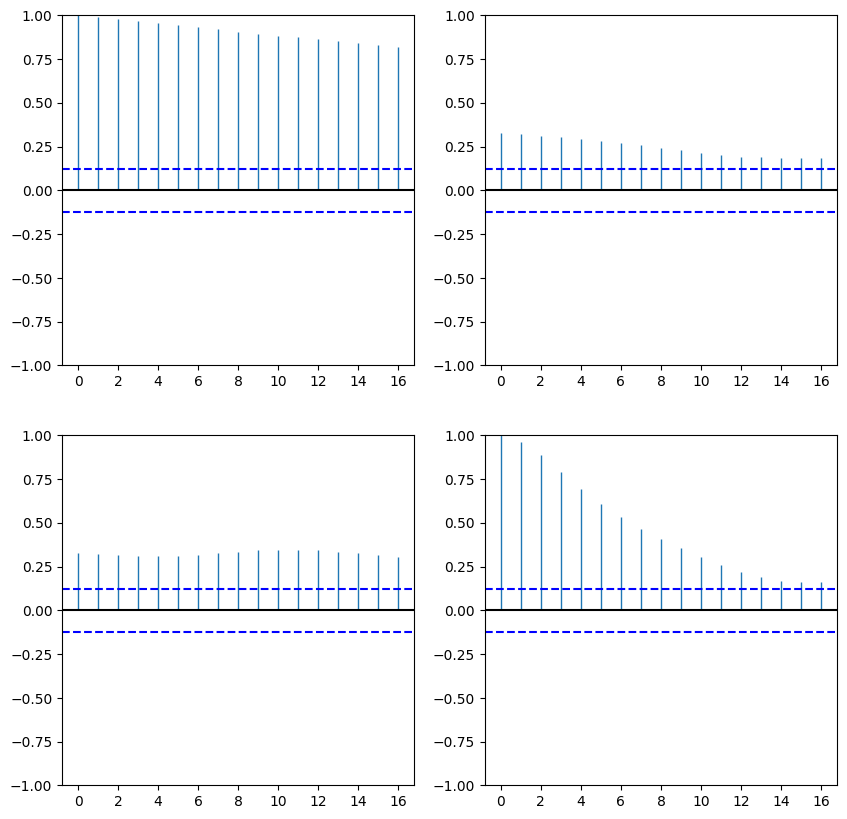

In [14]:
# Plot the Auto-Correlation Function (ACF) for multiple time series
multi_ACFfig(mda,         # Input data 
             nlags=16);   # Number of lags

In [15]:
# Apply first-order differencing and drop NaN values
dmda = mda.diff(1).dropna()  

# 'dlgdp' = differenced log GDP, 'drate' = differenced rate
dmda.columns = ['dlgdp', 'drate']  

# Display the transformed dataframe
dmda

,dlgdp,drate
1948-06-30,0.018241,-0.066666
1948-09-30,0.005362,0.100000
1948-12-31,0.001534,0.066666
1949-03-31,-0.013985,0.833334
1949-06-30,-0.003659,1.200000
...,...,...
2010-12-31,0.005807,0.033334
2011-03-31,0.000889,-0.566667
2011-06-30,0.003318,0.033333
2011-09-30,0.004490,0.033334


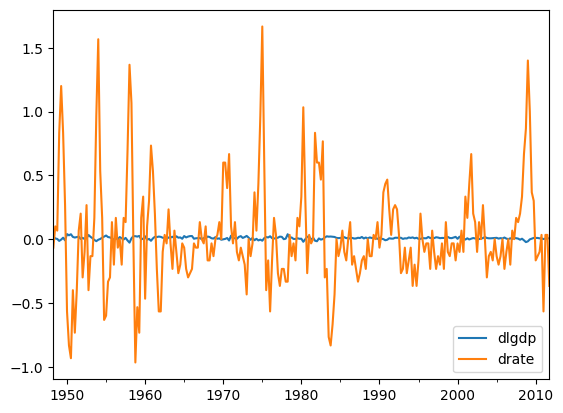

In [16]:
dmda.plot();

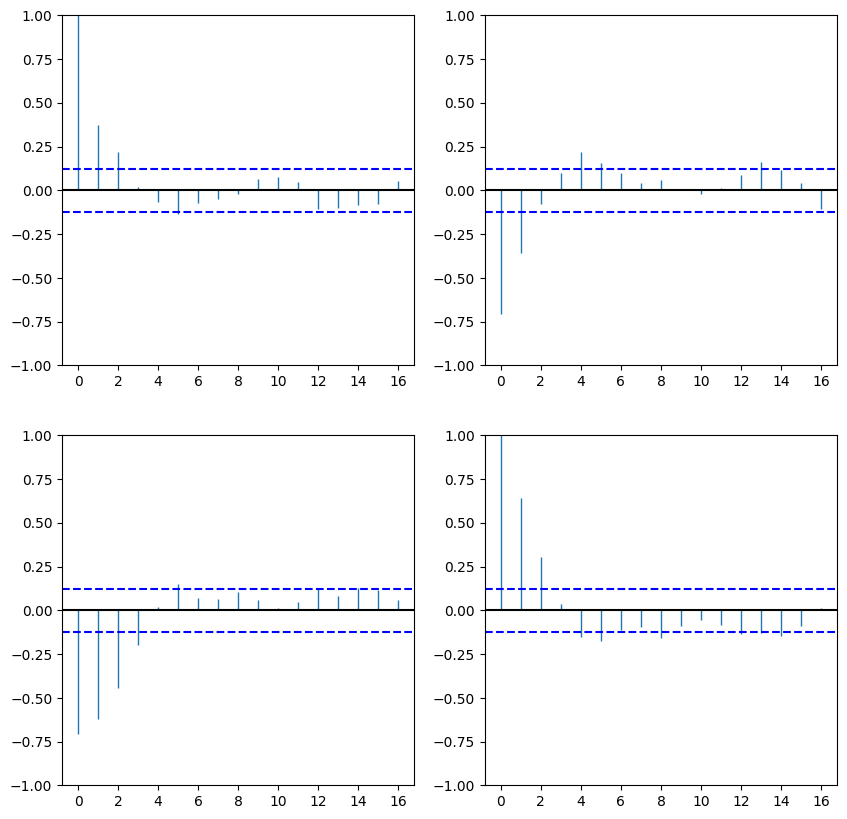

In [17]:
# Plot the Auto-Correlation Function (ACF) for the differenced time series
multi_ACFfig(dmda,       # Input data (first-differenced multivariate time series)
             nlags=16);  # Number of lags

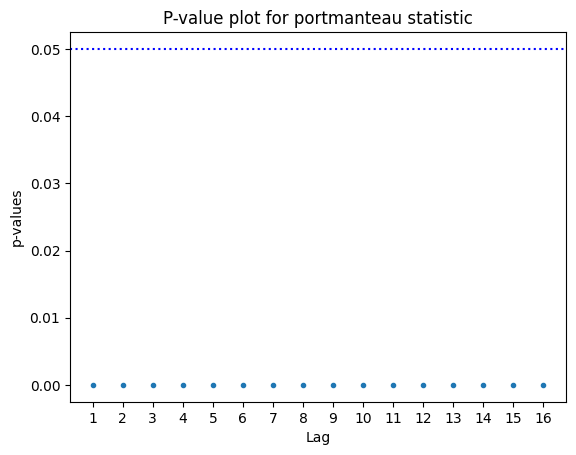

In [18]:
# Compute the Q-statistic and p-value for testing autocorrelation in the differenced multivariate time series
qs, pv = MultiQpvalue_plot(dmda,        # Input data (first-differenced multivariate time series)
                           nolags=16);  # Number of lags to test for autocorrelation (up to 16)

## Var(2)

In [20]:
coefs = np.array([[[0.5, 0.2, 0.0], [0.4, 0.3, 0.5], [0.5, 0.2, 0.3]], 
                    [[0.0, 0.01, 0.0], [-0.19, -0.2, 0.0], [-0.31, 0.01, -0.1]]])

sigma_u = np.array([[0.28, 0.03, 0.07], [0.03, 0.3, 0.14], [0.07, 0.14, 0.4]])

coefs_exog = np.array([0, 0, 0])

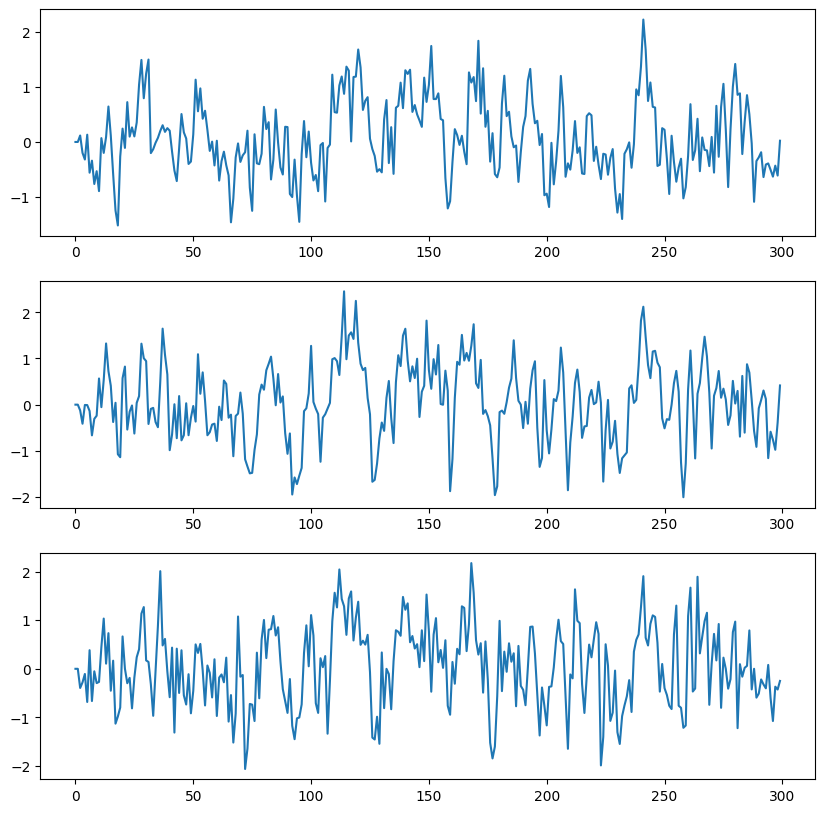

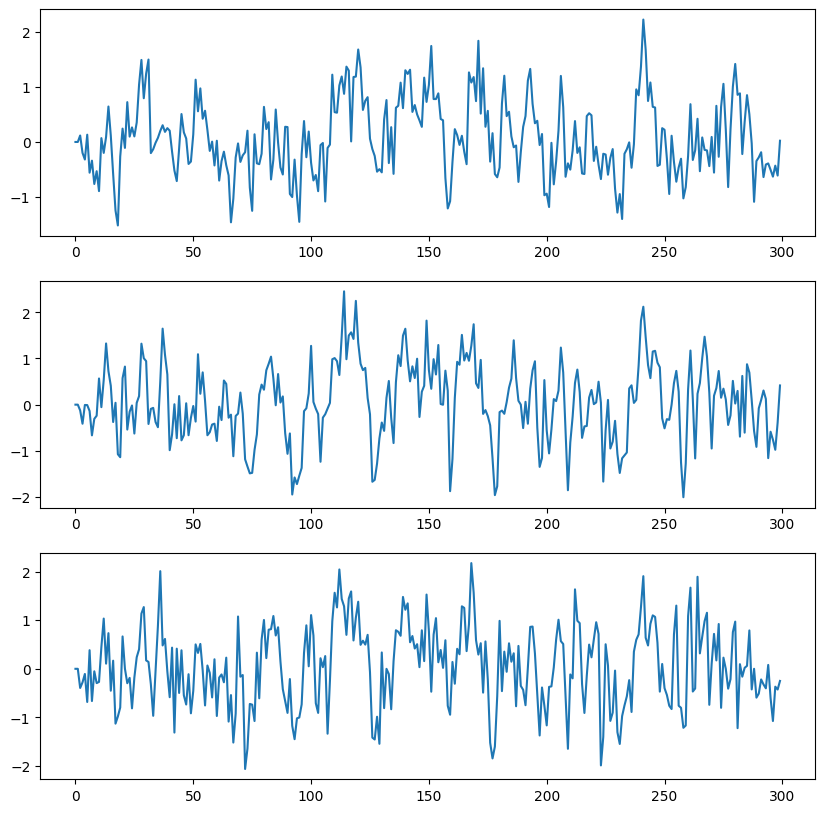

In [21]:
# Define a Vector Autoregressive (VAR) process
varProcess = VARProcess(coefs,                 # Coefficient matrix for the VAR process
                        coefs_exog,            # Exogenous variable coefficients (if any)
                        sigma_u)               # Covariance matrix of the error terms

# Simulate 300 steps from the VAR process
varSimul = varProcess.simulate_var(steps=300,  # Number of time steps to simulate
                                   seed=1237)  # Set random seed for reproducibility

# Generate a time series plot of the simulated VAR(2) process
varProcess.plotsim(steps=300,                  # Number of time steps to simulate for the plot
                   seed=1237)                  # Use the same seed for consistency

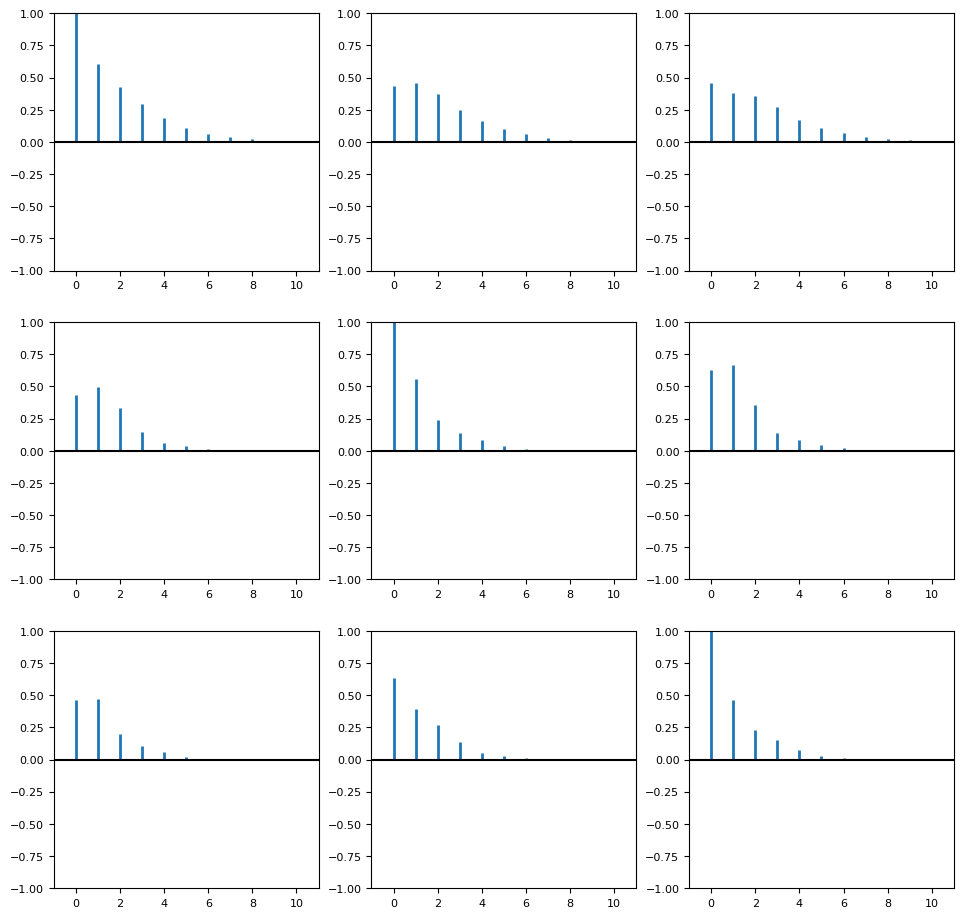

In [22]:
# Plot the autocorrelation function (ACF) for the simulated VAR process
varProcess.plot_acorr(linewidth=2,  # Set the line width for better visibility
                      nlags=10);     # Compute and plot autocorrelation up to 10 lags

## West German Macroeconomic Data

In [24]:
url4 = ('https://raw.githubusercontent.com/QuantLet/pyTSA/refs/heads/main/pyTSA_MacroDE/EconGermany.dat')

gEco = pd.read_csv(url4, header = 0, sep = '\s+')   # Extension name of the data is dat, not csv or txt.
                                                    # argument sep = '\s+' needed.
gEco

,yr.,sea.,inv.,inc.,cons.
0,1960,1,180,451,415
1,1960,2,179,465,421
2,1960,3,185,485,434
3,1960,4,192,493,448
4,1961,1,211,509,459
...,...,...,...,...,...
87,1981,4,830,2620,2225
88,1982,1,801,2639,2235
89,1982,2,824,2618,2237
90,1982,3,831,2628,2250


In [25]:
dates = pd.date_range('1960-03', periods = len(gEco), freq = 'Q')
gEco.index = dates

gEco

,yr.,sea.,inv.,inc.,cons.
1960-03-31,1960,1,180,451,415
1960-06-30,1960,2,179,465,421
1960-09-30,1960,3,185,485,434
1960-12-31,1960,4,192,493,448
1961-03-31,1961,1,211,509,459
...,...,...,...,...,...
1981-12-31,1981,4,830,2620,2225
1982-03-31,1982,1,801,2639,2235
1982-06-30,1982,2,824,2618,2237
1982-09-30,1982,3,831,2628,2250


In [26]:
gEco = gEco[['inv.', 'inc.', 'cons.']]
gEco

,inv.,inc.,cons.
1960-03-31,180,451,415
1960-06-30,179,465,421
1960-09-30,185,485,434
1960-12-31,192,493,448
1961-03-31,211,509,459
...,...,...,...
1981-12-31,830,2620,2225
1982-03-31,801,2639,2235
1982-06-30,824,2618,2237
1982-09-30,831,2628,2250


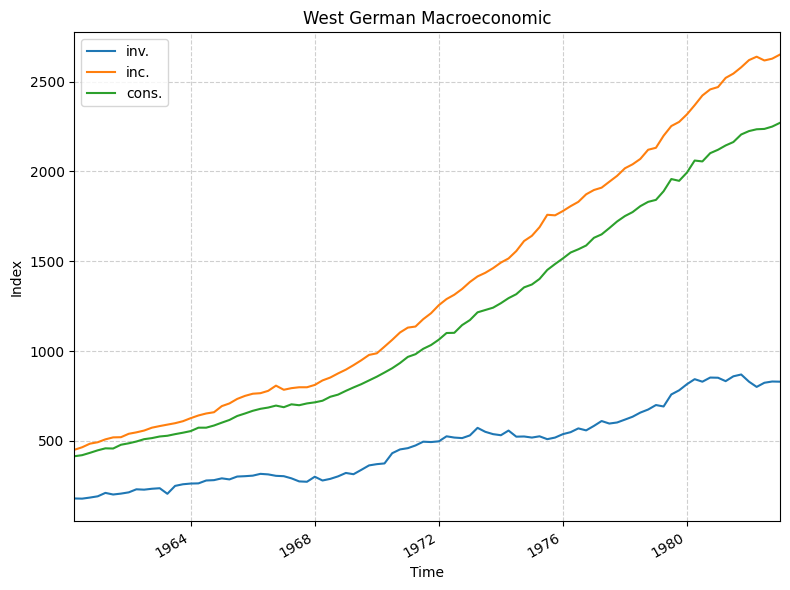

In [27]:
fig, ax = plt.subplots(figsize=(8, 6))

# Plot each column separately with a corresponding label
for col in gEco.columns:
    ax.plot(gEco.index, gEco[col], label=col)  

ax.set_xlabel('Time')
ax.set_ylabel('Index')
ax.set_title("West German Macroeconomic")
ax.set_xlim(pd.to_datetime('1960-03-31'), pd.to_datetime('1982-12-31'))
ax.grid(True, linestyle='--', alpha=0.6)
ax.legend(loc=2)

fig.autofmt_xdate()
plt.tight_layout()

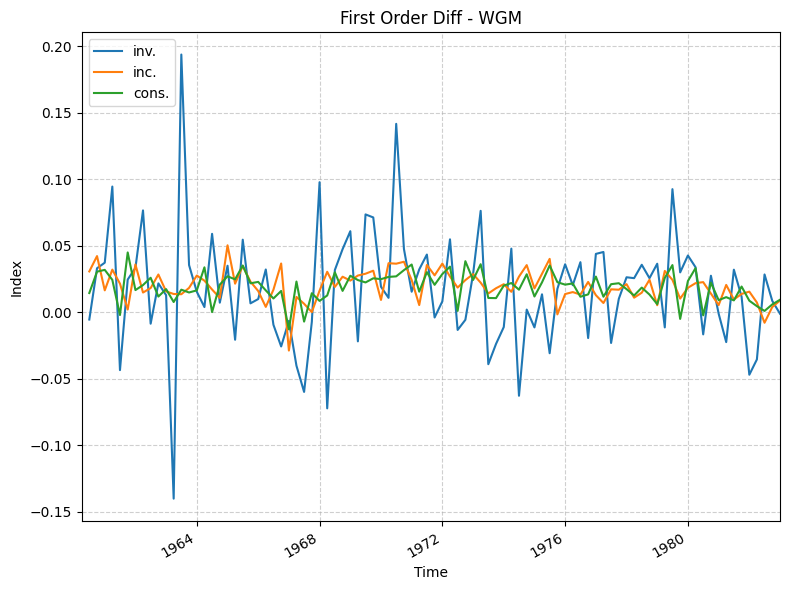

In [28]:
# Compute the log-differenced values of the gEco dataset to remove trends
dlge = np.log(gEco).diff(1).dropna()  


# Plot graph
fig, ax = plt.subplots(figsize=(8, 6))
for col in dlge.columns:
    ax.plot(dlge.index, dlge[col], label=col)  

ax.set_xlabel('Time')
ax.set_ylabel('Index')
ax.set_title("First Order Diff - WGM")
ax.set_xlim(pd.to_datetime('1960-03-31'), pd.to_datetime('1982-12-31'))
ax.grid(True, linestyle='--', alpha=0.6)
ax.legend(loc=2)

fig.autofmt_xdate()
plt.tight_layout()

In [29]:
dlge.head(4)

,inv.,inc.,cons.
1960-06-30,-0.005571,0.030570,0.014354
1960-09-30,0.032970,0.042111,0.030412
1960-12-31,0.037140,0.016360,0.031749
1961-03-31,0.094363,0.031939,0.024257


In [30]:
dlge.tail(4)

,inv.,inc.,cons.
1982-03-31,-0.035565,0.007226,0.004484
1982-06-30,0.028310,-0.007989,0.000894
1982-09-30,0.008459,0.003812,0.005795
1982-12-31,-0.001204,0.008714,0.009290


In [31]:
# Let's make the same dimension
dlgem = dlge['1960-06-30':'1981-12-31']

dlgem.tail(4)

,inv.,inc.,cons.
1981-03-31,-0.022553,0.020437,0.011252
1981-06-30,0.031899,0.009475,0.008819
1981-09-30,0.011561,0.013659,0.019223
1981-12-31,-0.047068,0.015385,0.008576


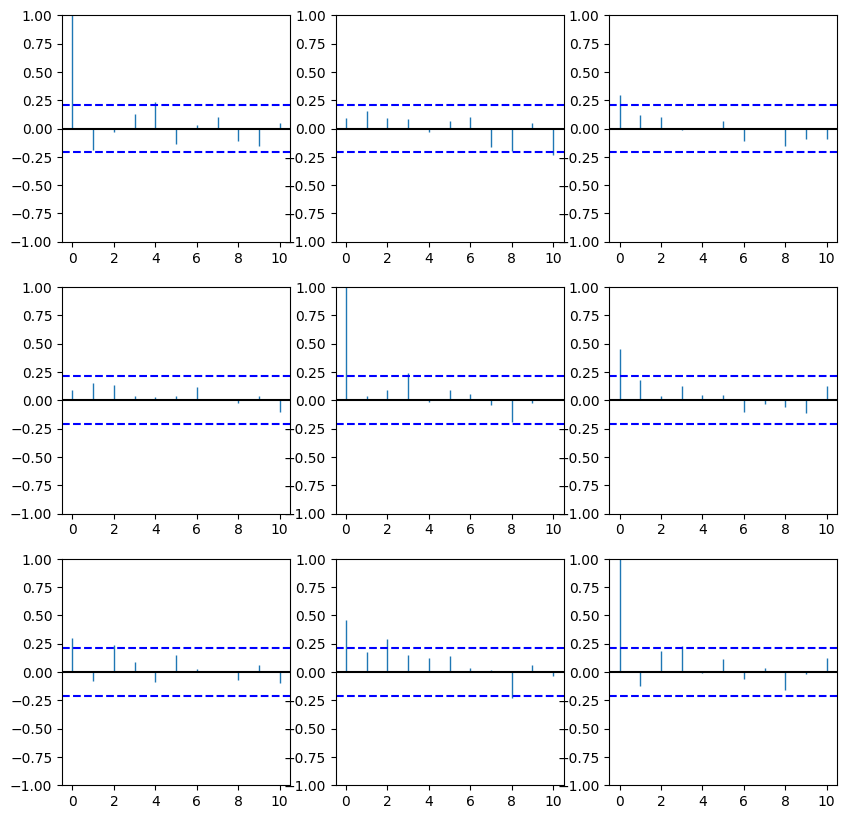

In [32]:
# Plot the Auto-Correlation Function (ACF) for the log-differenced multivariate time series
multi_ACFfig(dlgem,       # Input data (log-differenced multivariate time series)
             nlags=10);   # Number of lags to compute autocorrelation (up to 10)

In [33]:
# Create a VAR model instance with the transformed time series
dlgemMod = VAR(dlgem)  

In [34]:
# Select the optimal lag order for the VAR model using information criteria
print(dlgemMod.select_order(maxlags = 4))

<statsmodels.tsa.vector_ar.var_model.LagOrderResults object. Selected orders are: AIC -> 2, BIC -> 0, FPE -> 2, HQIC ->  1>


In [35]:
# Select the optimal lag order for the VAR model using information criteria
print(dlgemMod.select_order(maxlags = 9))

<statsmodels.tsa.vector_ar.var_model.LagOrderResults object. Selected orders are: AIC -> 1, BIC -> 0, FPE -> 1, HQIC ->  0>


In [36]:
# Fit a VAR model with a specified maximum lag order
dlgemRes = dlgemMod.fit(maxlags=2,  # Use up to 2 lags in the VAR model
                        ic=None,    # Do not use automatic information criteria selection
                        trend='c')  # Include a constant (intercept) term in the model
# Display Summary
print(dlgemRes.summary())

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 10, Mar, 2025
Time:                     14:26:10
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                   -24.0674
Nobs:                     85.0000    HQIC:                  -24.4282
Log likelihood:           707.684    FPE:                1.93219e-11
AIC:                     -24.6709    Det(Omega_mle):     1.52386e-11
--------------------------------------------------------------------
Results for equation inv.
              coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------
const           -0.011545         0.014813           -0.779           0.436
L1.inv.         -0.298530         0.117464           -2.541           0.011
L1.inc.          0.379067         0.512410            0.740           0.459
L1.co

In [37]:
# Check if the fitted VAR model is stable (all roots must be inside the unit circle)
dlgemRes.is_stable() 

True

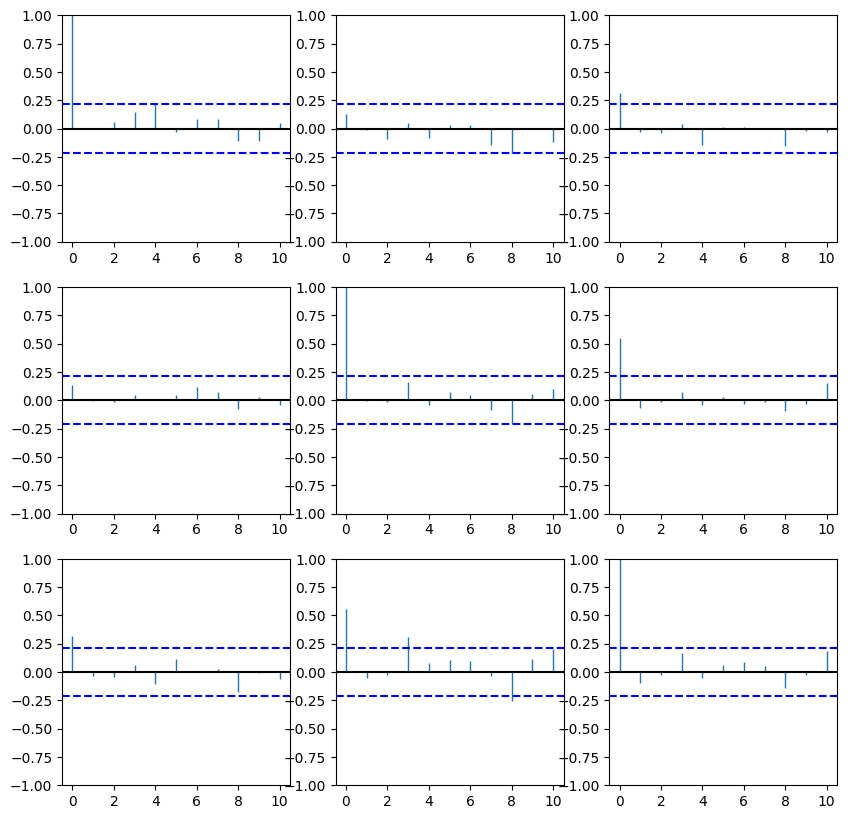

In [38]:
# Extract the residuals from the fitted VAR model
resid = dlgemRes.resid  

# Plot the Auto-Correlation Function (ACF) for the residuals to check for autocorrelation
multi_ACFfig(resid, nlags=10); 

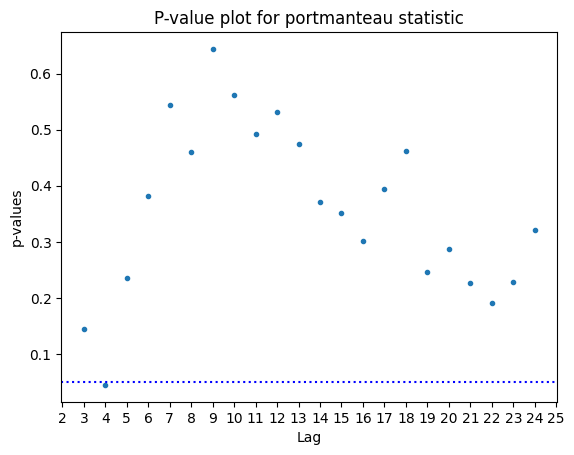

In [39]:
# Compute the Q-statistic and p-value for testing autocorrelation in the residuals of the VAR model
q, p = MultiQpvalue_plot(resid,                # Residuals from the fitted VAR model
                          p=2,                 # Number of AR terms (lags for autoregressive component)
                          q=0,                 # Number of MA terms (no moving average component)
                          noestimatedcoef=18,  # Number of estimated coefficients in the VAR model
                          nolags=24)           # Number of lags to test for autocorrelation (up to 24)

In [40]:
# Extract the estimated coefficient matrix from the fitted VAR model
coefMat = dlgemRes.coefs  
coefMat  

array([[[-0.29852954,  0.37906743,  0.66598562],
        [ 0.03938029, -0.14633432,  0.25628306],
        [-0.00513406,  0.28084152, -0.32127566]],

       [[-0.13889995,  0.18243526,  0.66811412],
        [ 0.05381098,  0.00744979,  0.01847657],
        [ 0.04134668,  0.36344357, -0.12828162]]])

In [41]:
# Extract the estimated covariance matrix of residuals from the fitted VAR model
sigma_u = dlgemRes.sigma_u  
sigma_u  

,inv.,inc.,cons.
inv.,0.002004,0.000065,0.000140
inc.,0.000065,0.000125,0.000061
cons.,0.000140,0.000061,0.000098


### **VAR(2) Model Equations**



### **Residual Covariance Matrix (Sigma_u)**

$$
\Sigma_u =
\begin{bmatrix}
0.002004 & 0.000065 & 0.000140 \\
0.000065 & 0.000125 & 0.000061 \\
0.000140 & 0.000061 & 0.000098
\end{bmatrix}
$$

Where:
- **Diagonal elements** $(\sigma_{ii}$) → Variances of residuals for investment, income, and consumption.
- **Off-diagonal elements** $(\sigma_{ij}$) → Covariances between residuals of different variables.

---

### **Matrix Form of the VAR(2) Model**

$$
\begin{bmatrix}
\text{inv}_t \\
\text{inc}_t \\
\text{cons}_t
\end{bmatrix}
=
\begin{bmatrix}
-0.298 & 0.379 & 0.666 \\
0.039 & -0.146 & 0.256 \\
-0.005 & 0.281 & -0.321
\end{bmatrix}
\begin{bmatrix}
\text{inv}_{t-1} \\
\text{inc}_{t-1} \\
\text{cons}_{t-1}
\end{bmatrix}
+
\begin{bmatrix}
-0.139 & 0.182 & 0.668 \\
0.054 & 0.007 & 0.018 \\
0.041 & 0.363 & -0.128
\end{bmatrix}
\begin{bmatrix}
\text{inv}_{t-2} \\
\text{inc}_{t-2} \\
\text{cons}_{t-2}
\end{bmatrix}
+
\begin{bmatrix}
\varepsilon_{\text{inv},t} \\
\varepsilon_{\text{inc},t} \\
\varepsilon_{\text{cons},t}
\end{bmatrix}
$$

Where:
- The **first matrix** represents the **lag 1 coefficients** (\(A_1\)).
- The **second matrix** represents the **lag 2 coefficients** (\(A_2\)).
- The **third vector** represents the **residuals** $\varepsilon_t$, which follow a **multivariate normal distribution** with **covariance matrix \(\Sigma_u\)**.


In [43]:
dlgem = dlgem.values

In [44]:
type(dlgem)

numpy.ndarray

In [45]:
# Generate forecast intervals (no need to convert dlgem)
point, lower, upper = dlgemRes.forecast_interval(dlgem, steps=4)

# Display results
print("Forecasted Values:\n", point)
print("\nLower Bound of Interval:\n", lower)
print("\nUpper Bound of Interval:\n", upper)

Forecasted Values:
 [[0.02777827 0.01473927 0.01903946]
 [0.01350363 0.01712411 0.01468125]
 [0.01224347 0.01931209 0.01834218]
 [0.01539323 0.01904964 0.01862259]]

Lower Bound of Interval:
 [[-0.05997249 -0.0071755  -0.00035114]
 [-0.07852948 -0.00562412 -0.0056024 ]
 [-0.08028986 -0.00372197 -0.00345532]
 [-0.0776575  -0.0041226  -0.00329656]]

Upper Bound of Interval:
 [[0.11552903 0.03665404 0.03843006]
 [0.10553675 0.03987234 0.03496491]
 [0.1047768  0.04234616 0.04013969]
 [0.10844396 0.04222187 0.04054173]]


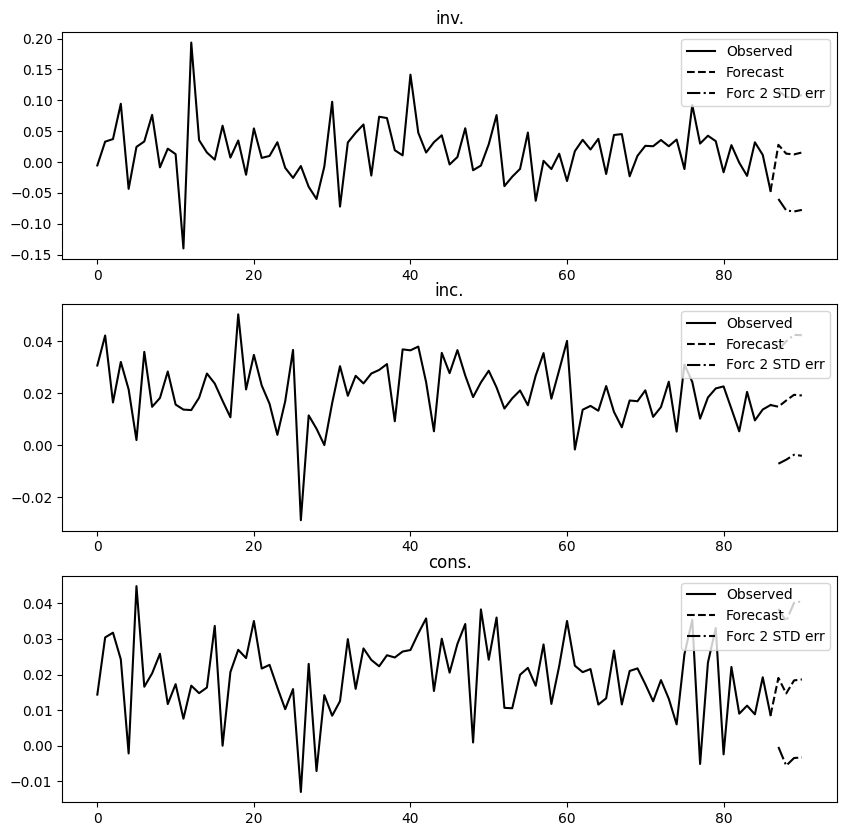

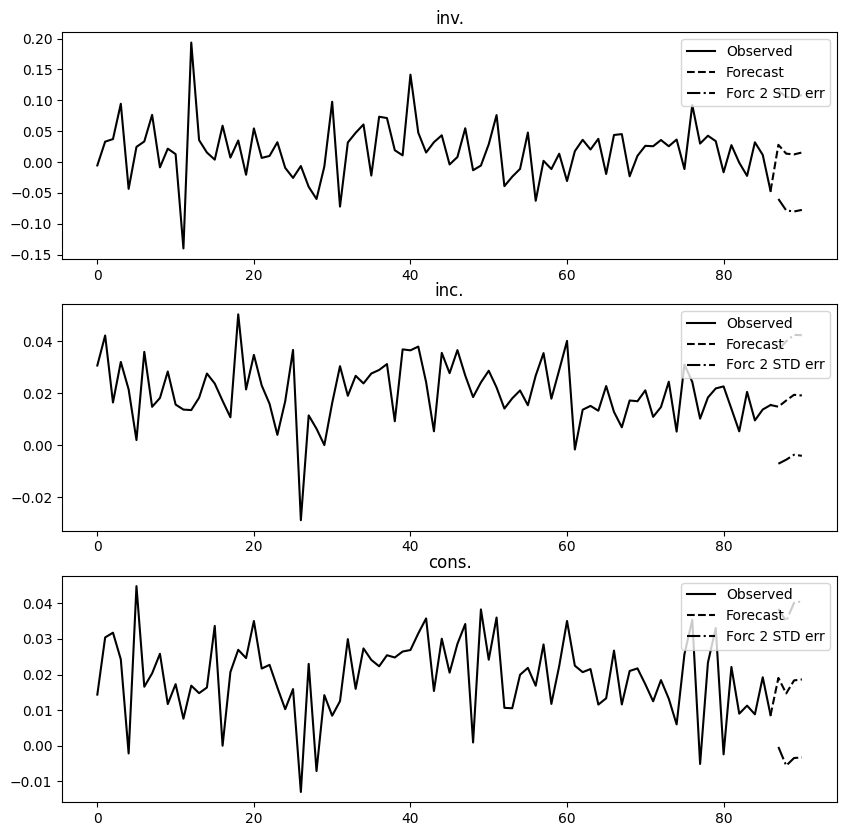

In [46]:
dlgemRes.plot_forecast(steps = 4)

In [47]:
# Perform a Granger causality test to check if 'inc.' (income) causes 'cons.' (consumption)
g1 = dlgemRes.test_causality(caused='cons.',     # The dependent variable ('consumption')
                             causing='inc.',     # The independent variable ('income')
                             kind='f',           # Use the F-test for Granger causality
                             signif=0.05);        # Significance level at 5%
print(g1)                                        # Display the test results

<statsmodels.tsa.vector_ar.hypothesis_test_results.CausalityTestResults object. H_0: inc. does not Granger-cause cons.: reject at 5% significance level. Test statistic: 7.038, critical value: 3.034>, p-value: 0.001>


In [48]:
# Extract test results
test_stat = g1.test_statistic
crit_value = g1.crit_value
p_value = g1.pvalue

# Print formatted results
print("\n=== Granger Causality Test ===")
print(f"Null Hypothesis (H0): 'Income (inc.) does NOT Granger-cause Consumption (cons.)'")
print(f"Test Statistic: {test_stat:.3f}")
print(f"Critical Value (5% level): {crit_value:.3f}")
print(f"p-value: {p_value:.4f}")

# Interpretation
if p_value < 0.05:
    print("\nConclusion: Reject H0 → Income does Granger-cause Consumption.")
else:
    print("\nConclusion: Fail to Reject H0 → No evidence that Income Granger-causes Consumption.")


=== Granger Causality Test ===
Null Hypothesis (H0): 'Income (inc.) does NOT Granger-cause Consumption (cons.)'
Test Statistic: 7.038
Critical Value (5% level): 3.034
p-value: 0.0011

Conclusion: Reject H0 → Income does Granger-cause Consumption.


In [49]:
# Perform a Granger causality test to check if 'cons.' (consumption) causes 'inc.' (income)
g2 = dlgemRes.test_causality(caused='inc.',     # The dependent variable ('income')
                             causing='cons.',   # The independent variable ('consumption')
                             kind='f',          # Use the F-test for Granger causality
                             signif=0.05)       # Significance level at 5%
print(g2)                                       # Display the test results

<statsmodels.tsa.vector_ar.hypothesis_test_results.CausalityTestResults object. H_0: cons. does not Granger-cause inc.: fail to reject at 5% significance level. Test statistic: 1.718, critical value: 3.034>, p-value: 0.182>


In [50]:
# Extract test results
test_stat2 = g2.test_statistic
crit_value2 = g2.crit_value
p_value2 = g2.pvalue

# Print formatted results
print("\n=== Granger Causality Test ===")
print(f"Null Hypothesis (H0): 'Income (inc.) does NOT Granger-cause Consumption (cons.)'")
print(f"Test Statistic: {test_stat2:.3f}")
print(f"Critical Value (5% level): {crit_value2:.3f}")
print(f"p-value: {p_value2:.4f}")

# Interpretation
if p_value2 < 0.05:
    print("\nConclusion: Reject H0 → Income does Granger-cause Consumption.")
else:
    print("\nConclusion: Fail to Reject H0 → No evidence that Income Granger-causes Consumption.")


=== Granger Causality Test ===
Null Hypothesis (H0): 'Income (inc.) does NOT Granger-cause Consumption (cons.)'
Test Statistic: 1.718
Critical Value (5% level): 3.034
p-value: 0.1817

Conclusion: Fail to Reject H0 → No evidence that Income Granger-causes Consumption.


In [51]:
# Generate an Impulse Response Function (IRF) for the VAR model
irf = dlgemRes.irf(periods=10)  # Compute IRF for 10 periods ahead
irf

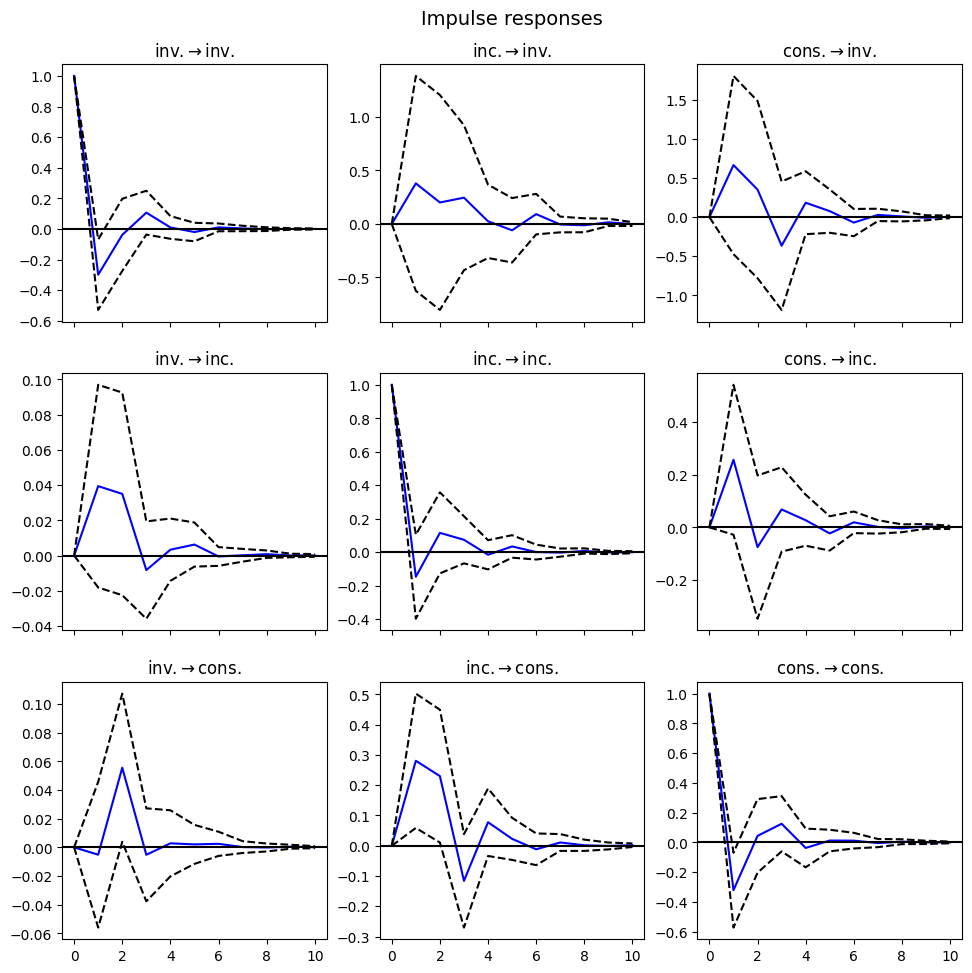

In [52]:
# Plot the Impulse Response Function (IRF) for the VAR model
irf.plot();  # Visualize how shocks to one variable affect others over 10 periods

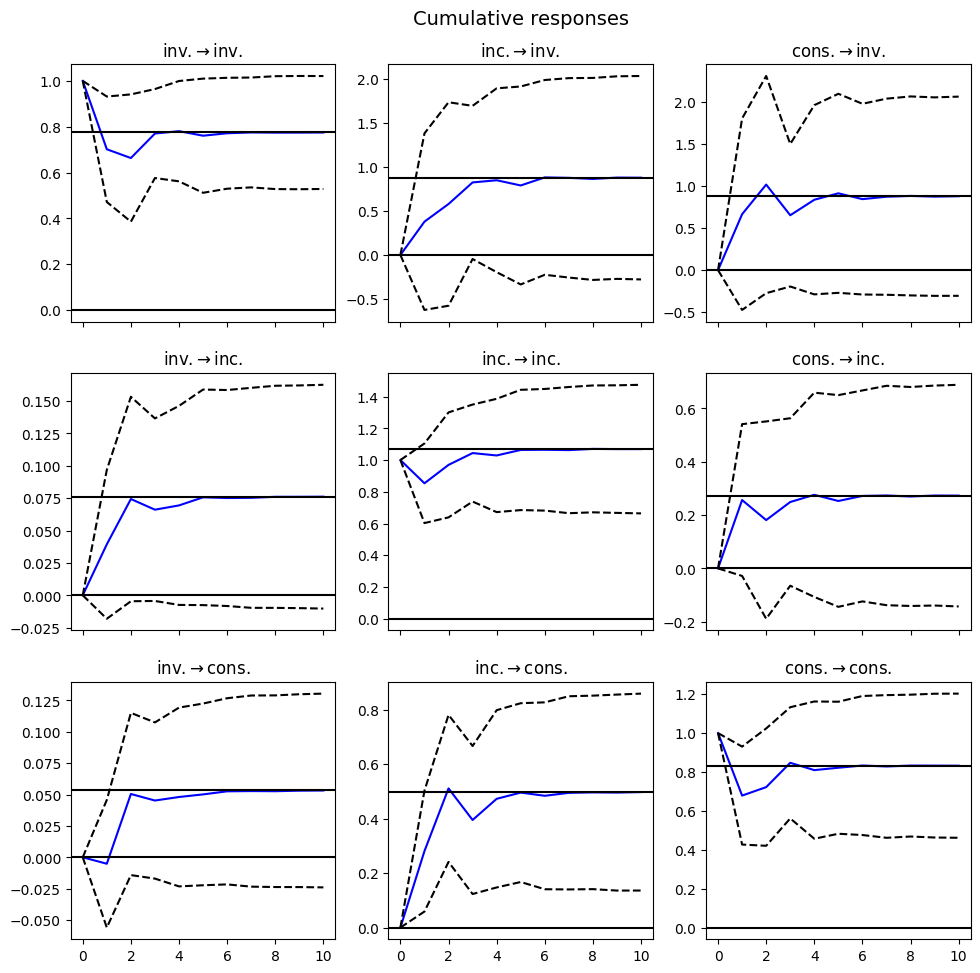

In [53]:
# Plot the cumulative impulse response function (IRF) effects for the VAR model
irf.plot_cum_effects();  # Shows the accumulated impact of shocks over 10 periods

## United States Macroeconomic Time Series

In [55]:
mdata = sm.datasets.macrodata.load_pandas().data
mdata = mdata[['realgdp', 'realcons', 'realinv']]
dates = pd.date_range('1959-01', periods = len(mdata), freq = 'Q')
mdata.index = dates
mdata.head()

,realgdp,realcons,realinv
1959-03-31,2710.349,1707.4,286.898
1959-06-30,2778.801,1733.7,310.859
1959-09-30,2775.488,1751.8,289.226
1959-12-31,2785.204,1753.7,299.356
1960-03-31,2847.699,1770.5,331.722


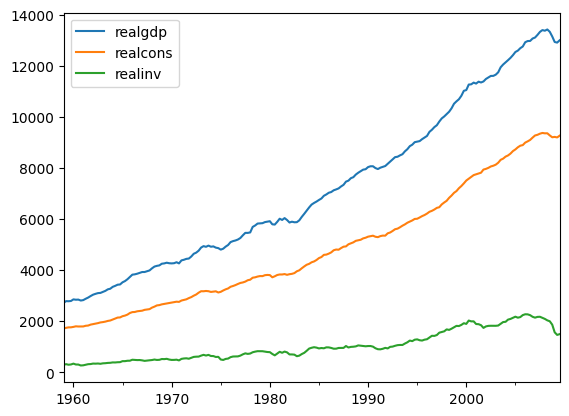

In [56]:
mdata.plot();

In [57]:
dLdata = np.log(mdata).diff(1).dropna()

dLdata.head()

,realgdp,realcons,realinv
1959-06-30,0.024942,0.015286,0.080213
1959-09-30,-0.001193,0.010386,-0.072131
1959-12-31,0.003495,0.001084,0.034425
1960-03-31,0.022190,0.009534,0.102664
1960-06-30,-0.004685,0.012572,-0.106694


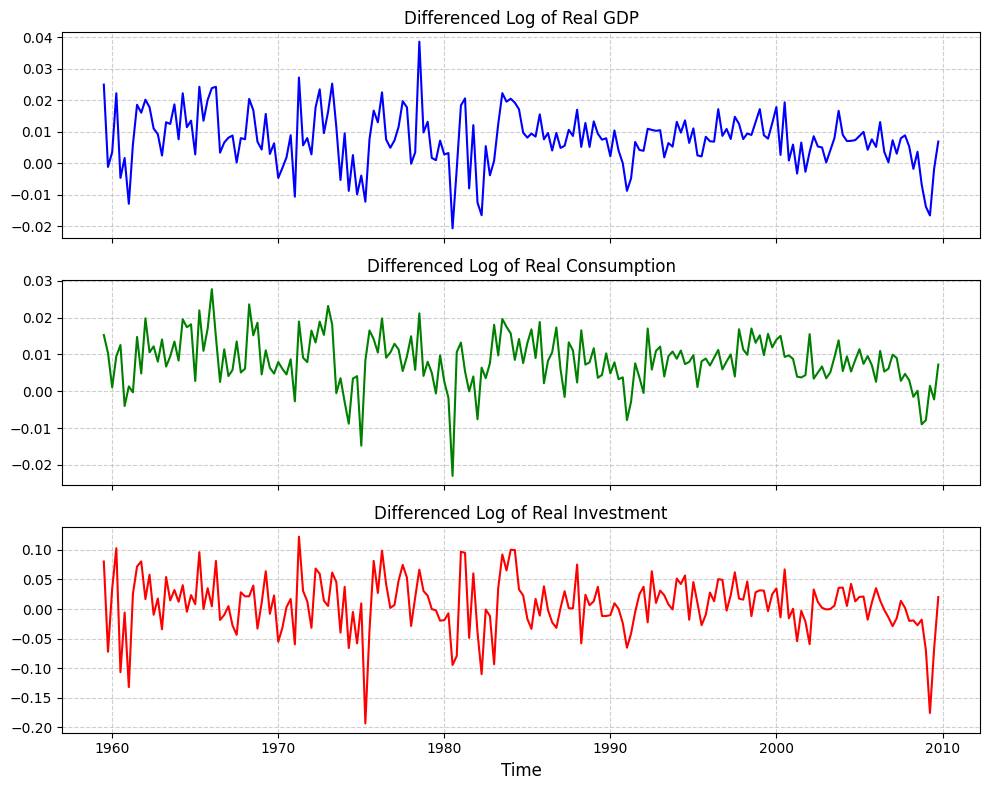

In [58]:
# Create figure and subplots with improved spacing and consistent formatting
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 8), sharex=True)

# Plot each series with labels and improved aesthetics
axes[0].plot(dLdata['realgdp'], color='b', linewidth=1.5)
axes[0].set_title('Differenced Log of Real GDP', fontsize=12)
axes[0].grid(True, linestyle='--', alpha=0.6)

axes[1].plot(dLdata['realcons'], color='g', linewidth=1.5)
axes[1].set_title('Differenced Log of Real Consumption', fontsize=12)
axes[1].grid(True, linestyle='--', alpha=0.6)

axes[2].plot(dLdata['realinv'], color='r', linewidth=1.5)
axes[2].set_title('Differenced Log of Real Investment', fontsize=12)
axes[2].grid(True, linestyle='--', alpha=0.6)

# Improve axis labeling
axes[-1].set_xlabel('Time', fontsize=12)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

In [59]:
dLdata

,realgdp,realcons,realinv
1959-06-30,0.024942,0.015286,0.080213
1959-09-30,-0.001193,0.010386,-0.072131
1959-12-31,0.003495,0.001084,0.034425
1960-03-31,0.022190,0.009534,0.102664
1960-06-30,-0.004685,0.012572,-0.106694
...,...,...,...
2008-09-30,-0.006781,-0.008948,-0.017836
2008-12-31,-0.013805,-0.007843,-0.069165
2009-03-31,-0.016612,0.001511,-0.175598
2009-06-30,-0.001851,-0.002196,-0.067561


In [60]:
myd = dLdata['1959-06-30' : '2008-12-31']

# leave the last three data for forecasting comparison
myd.tail(4)

,realgdp,realcons,realinv
2008-03-31,-0.001823,-0.001496,-0.019276
2008-06-30,0.003614,0.000150,-0.027435
2008-09-30,-0.006781,-0.008948,-0.017836
2008-12-31,-0.013805,-0.007843,-0.069165


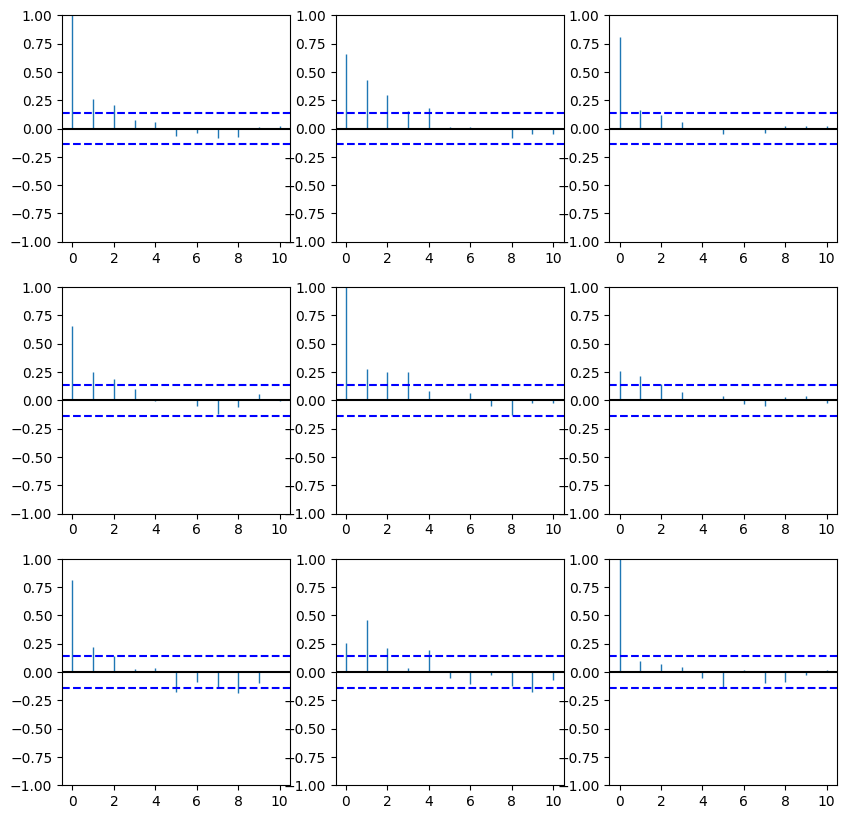

In [61]:
# Plot the autocorrelation functions (ACF) for all variables in 'myd'
multi_ACFfig(myd,       # DataFrame containing multiple time series
             nlags=10); # Number of lags to compute autocorrelation

In [62]:
# Create a VAR model using the time series data in 'myd'
mydmod1 = VAR(myd)  

In [63]:
# Select the optimal lag order for the VAR model
print(mydmod1.select_order(maxlags=10))

<statsmodels.tsa.vector_ar.var_model.LagOrderResults object. Selected orders are: AIC -> 1, BIC -> 1, FPE -> 1, HQIC ->  1>


In [64]:
# Select the optimal lag order for the VAR model
print(mydmod1.select_order(maxlags = 11))

<statsmodels.tsa.vector_ar.var_model.LagOrderResults object. Selected orders are: AIC -> 3, BIC -> 1, FPE -> 3, HQIC ->  1>


In [65]:
# Fit a VARMAX (Vector Autoregression Moving-Average with Exogenous Regressors) model to the data
mydmod = VARMAX(myd,                        # Dataset containing multiple time series
                order=(3, 0),               # Set autoregressive order = 3, no moving-average component
                enforce_stationarity=True)  # Ensure the model remains stationary

# Fit the model to the data
modfit = mydmod.fit()

# Print the model summary with parameter estimates and statistics
print(modfit.summary())  

                                   Statespace Model Results                                   
Dep. Variable:     ['realgdp', 'realcons', 'realinv']   No. Observations:                  199
Model:                                         VAR(3)   Log Likelihood                1964.274
                                          + intercept   AIC                          -3856.548
Date:                                Mon, 10 Mar 2025   BIC                          -3737.989
Time:                                        14:27:07   HQIC                         -3808.564
Sample:                                    06-30-1959                                         
                                         - 12-31-2008                                         
Covariance Type:                                  opg                                         
Ljung-Box (L1) (Q):       0.03, 0.03, 0.00   Jarque-Bera (JB):   15.73, 0.90, 11.02
Prob(Q):                  0.85, 0.87, 0.95   Prob(JB):       

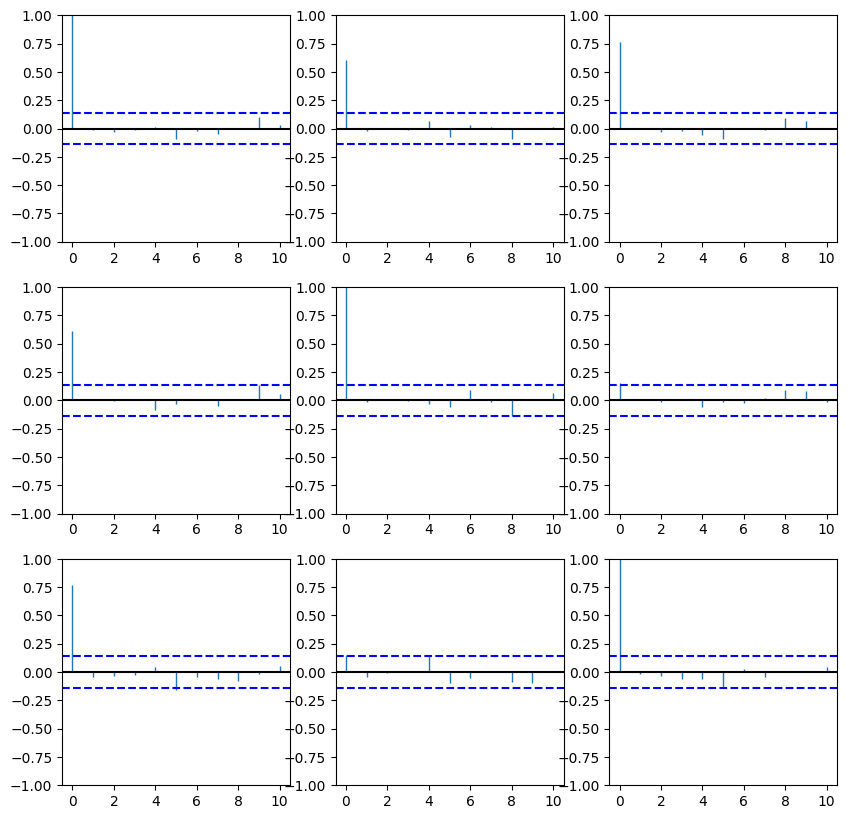

In [66]:
resid = modfit.resid

multi_ACFfig(resid, nlags = 10);

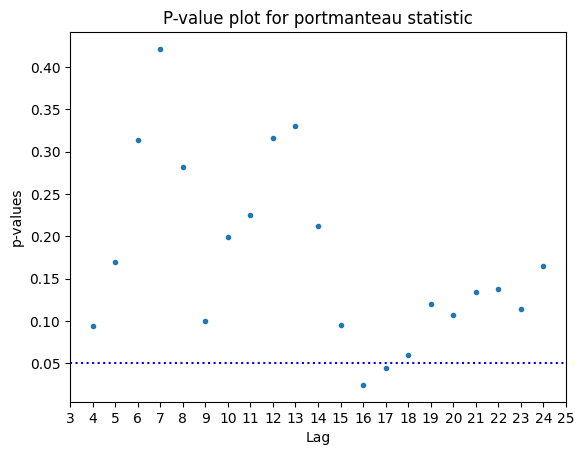

In [67]:
# Perform a multivariate Ljung-Box Q-test to check for autocorrelation in residuals
qs, pv = MultiQpvalue_plot(resid,               # Residuals from the VAR model
                           p=3,                 # Number of autoregressive terms in the model
                           q=0,                 # No moving-average terms
                           noestimatedcoef=27,  # Number of estimated coefficients
                           nolags=24)           # Number of lags to test for autocorrelation

In [68]:
# Retrieve the parameter names from the fitted VARMAX model
param = mydmod.param_names  # List of model parameters

# Initialize a new VARMAX model without enforcing stationarity
mydmodf = VARMAX(myd,                         # Dataset containing multiple time series
                 order=(3, 0),                # Set autoregressive order = 3, no moving-average component
                 enforce_stationarity=False)  # Allow non-stationary behavior

In [69]:
# Cannot fix individual autoregressive parameters when
# ‘enforce_stationarity = True‘. In this case, must either
# fix all autoregressive parameters or none.
with mydmodf.fix_params({param[0]: 0.0, param[5]: 0.0, 
                         param[6]: 0.0, param[8]: 0.0, 
                         param[9]: 0.0, param[11]: 0.0,
                         param[12]: 0.0, param[14]: 0.0,
                         param[15]: 0.0, param[17]: 0.0, 
                         param[24]: 0.0, param[26]: 0.0, 
                         param[27]: 0.0, param[28]: 0.0, 
                         param[29]: 0.0}): modff = mydmodf.fit(method = 'bfgs')
print(modff.summary())

Optimization terminated successfully.
         Current function value: -9.849744
         Iterations: 44
         Function evaluations: 57
         Gradient evaluations: 57
                                   Statespace Model Results                                   
Dep. Variable:     ['realgdp', 'realcons', 'realinv']   No. Observations:                  199
Model:                                         VAR(3)   Log Likelihood                1960.099
                                          + intercept   AIC                          -3878.198
Date:                                Mon, 10 Mar 2025   BIC                          -3809.039
Time:                                        14:28:01   HQIC                         -3850.207
Sample:                                    06-30-1959                                         
                                         - 12-31-2008                                         
Covariance Type:                                  opg              

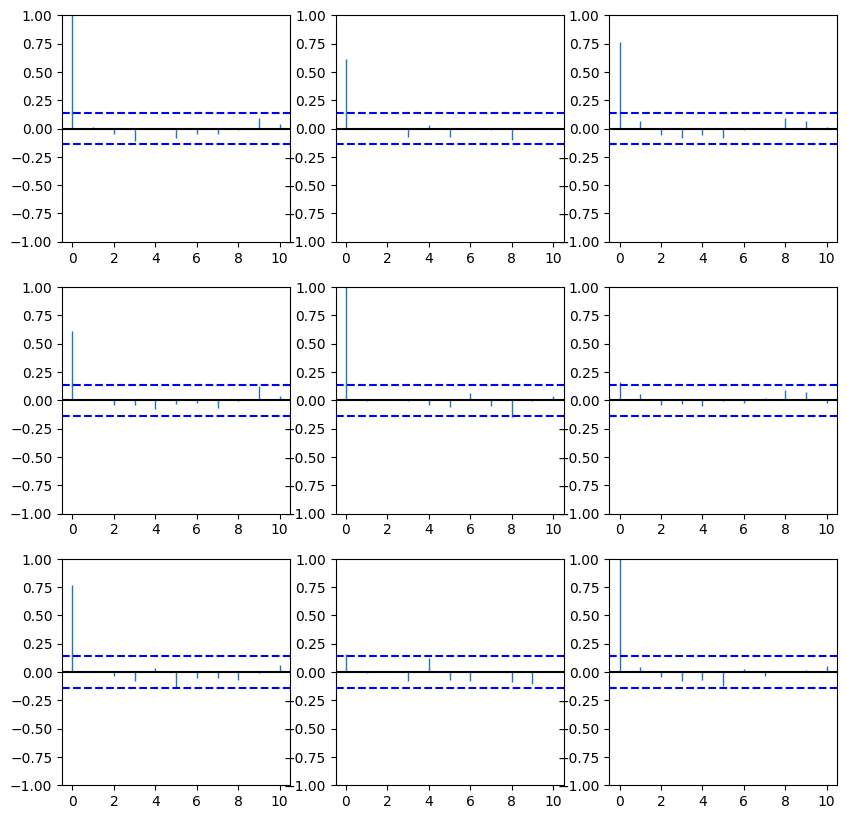

In [70]:
residf = modff.resid

multi_ACFfig(residf, nlags = 10);

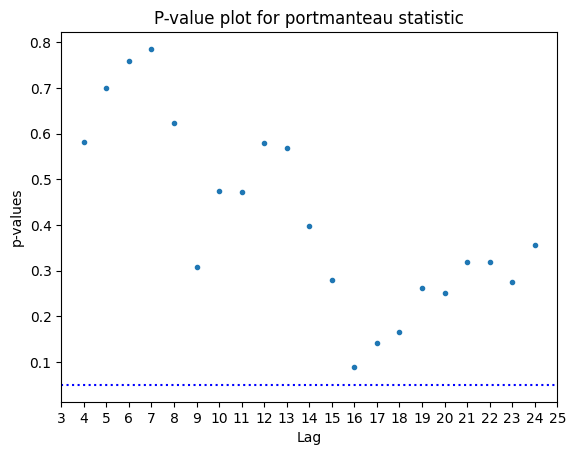

In [71]:
# Perform a multivariate Ljung-Box Q-test on the residuals of the second VARMAX model
qs, pv = MultiQpvalue_plot(residf,              # Residuals from the VARMAX model without stationarity enforcement
                           p=3,                 # Number of autoregressive terms in the model
                           q=0,                 # No moving-average terms
                           noestimatedcoef=13,  # Number of estimated coefficients
                           nolags=24)           # Number of lags to test for autocorrelation

In [72]:
fore = modff.predict(end = '2009-09-30')
fore

,realgdp,realcons,realinv
1959-06-30,0.007398,0.008142,0.007281
1959-09-30,0.011381,0.011546,0.021406
1959-12-31,0.013017,0.010750,0.029664
1960-03-31,0.005523,0.007852,-0.009894
1960-06-30,0.003821,0.007336,-0.008699
...,...,...,...
2008-09-30,-0.000585,0.002748,-0.033144
2008-12-31,-0.004374,0.001342,-0.050366
2009-03-31,-0.005338,-0.000965,-0.049151
2009-06-30,-0.003474,0.000262,-0.031701


In [73]:
realgdpFitgdp = pd.DataFrame({'realgdp':dLdata['realgdp'], 'fittedgdp':fore['realgdp']})
realconsFitcons = pd.DataFrame({'realcons':dLdata['realcons'], 'fittedcons':fore['realcons']})
realinvFitinv = pd.DataFrame({'realinv':dLdata['realinv'], 'fittedinv':fore['realinv']})

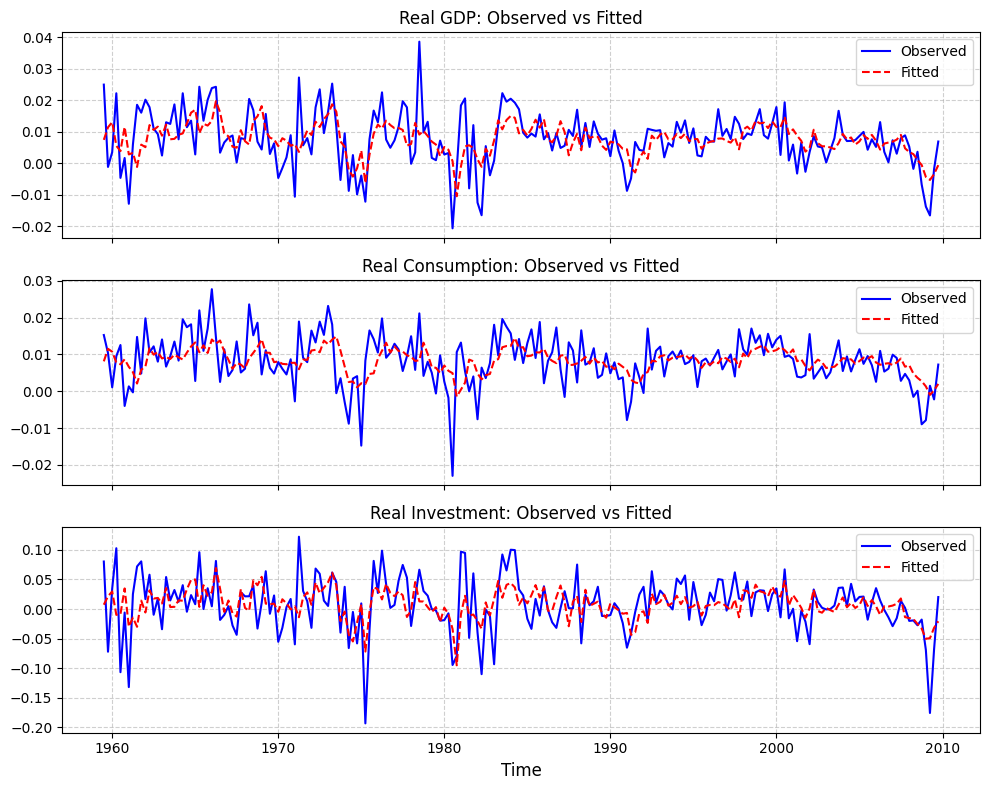

In [74]:
# Create figure and subplots with improved spacing and consistent formatting
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 8), sharex=True)

# Plot Real GDP with observed and fitted values
axes[0].plot(realgdpFitgdp.iloc[:, 0], label='Observed', linestyle='-', color='b', linewidth=1.5)
axes[0].plot(realgdpFitgdp.iloc[:, 1], label='Fitted', linestyle='--', color='r', linewidth=1.5)
axes[0].set_title('Real GDP: Observed vs Fitted', fontsize=12)
axes[0].legend()
axes[0].grid(True, linestyle='--', alpha=0.6)

# Plot Real Consumption with observed and fitted values
axes[1].plot(realconsFitcons.iloc[:, 0], label='Observed', linestyle='-', color='b', linewidth=1.5)
axes[1].plot(realconsFitcons.iloc[:, 1], label='Fitted', linestyle='--', color='r', linewidth=1.5)
axes[1].set_title('Real Consumption: Observed vs Fitted', fontsize=12)
axes[1].legend()
axes[1].grid(True, linestyle='--', alpha=0.6)

# Plot Real Investment with observed and fitted values
axes[2].plot(realinvFitinv.iloc[:, 0], label='Observed', linestyle='-', color='b', linewidth=1.5)
axes[2].plot(realinvFitinv.iloc[:, 1], label='Fitted', linestyle='--', color='r', linewidth=1.5)
axes[2].set_title('Real Investment: Observed vs Fitted', fontsize=12)
axes[2].legend()
axes[2].grid(True, linestyle='--', alpha=0.6)

# Improve axis labeling
axes[-1].set_xlabel('Time', fontsize=12)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()